In [1]:
#Analysis of Re doped MoS2

In [98]:
#Dependencies
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import matplotlib.patches

#for fft plotting
from scipy import fftpack
from matplotlib.colors import LogNorm

#For filtering
import cv2
import os


#for peak detection

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

In [64]:
#importing dm4 images 

from ncempy.io import dm
from matplotlib_scalebar.scalebar import ScaleBar

im01 = dm.dmReader('data/BSE._0201_Cut.dm4')
im02 = dm.dmReader('data/BSE._0215_Cut.dm4')
im03 = dm.dmReader('data/BSE._0219_Cut.dm4')
im04 = dm.dmReader('data/BSE._0211.dm4')

In [65]:
print(im01['data'].min(), im01['data'].max())

101407.0 266110.0


In [66]:
#normalizing data:
norm_01 = (im01['data'] - im01['data'].min())/np.ptp(im01['data'])
norm_02 = (im02['data'] - im02['data'].min())/np.ptp(im02['data'])
norm_03 = (im03['data'] - im03['data'].min())/np.ptp(im03['data'])
norm_04 = (im04['data'] - im04['data'].min())/np.ptp(im04['data'])

In [67]:
print(norm_01.min(), norm_01.max())

0.0 1.0


In [68]:
norm_01.dtype

dtype('float32')

<IPython.core.display.Javascript object>


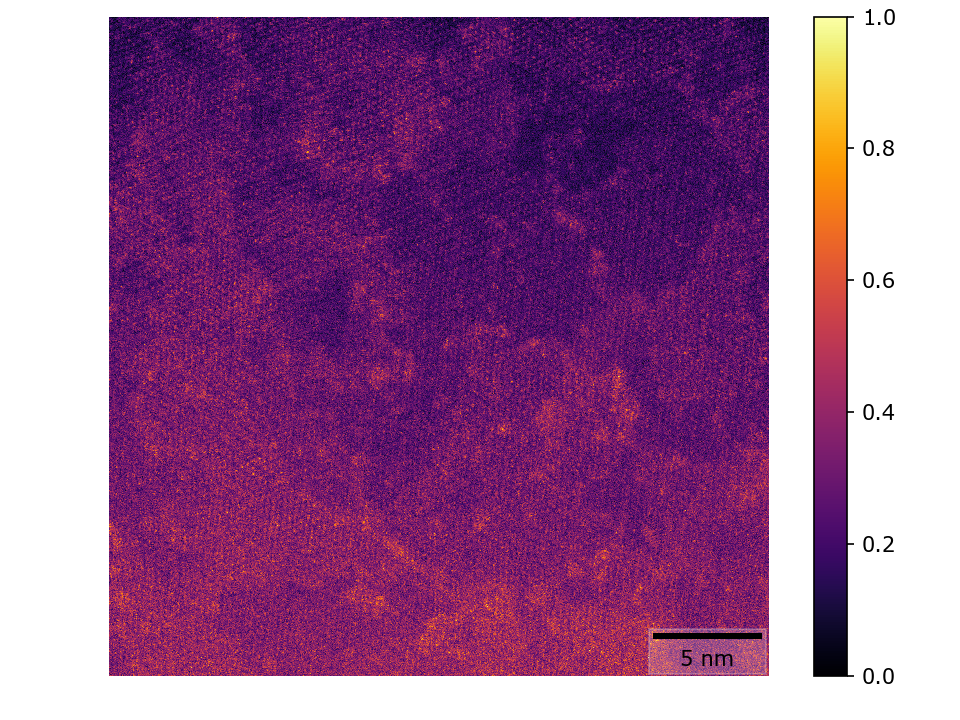

In [81]:
#plotting normalized data and its fft

plt.imshow(norm_01, cmap=plt.cm.inferno) #show the single image from the data file

scalebar = ScaleBar((im01['pixelSize'][0])*1e-9)  # 1 pixel = 2.2736310958862305e-11 meters
plt.gca().add_artist(scalebar)
scalebar.location = 'lower right'
scalebar.box_alpha = 0.2
scalebar.length_fraction = 0.2

plt.axis('off')
plt.colorbar()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()
plt.savefig('images/hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


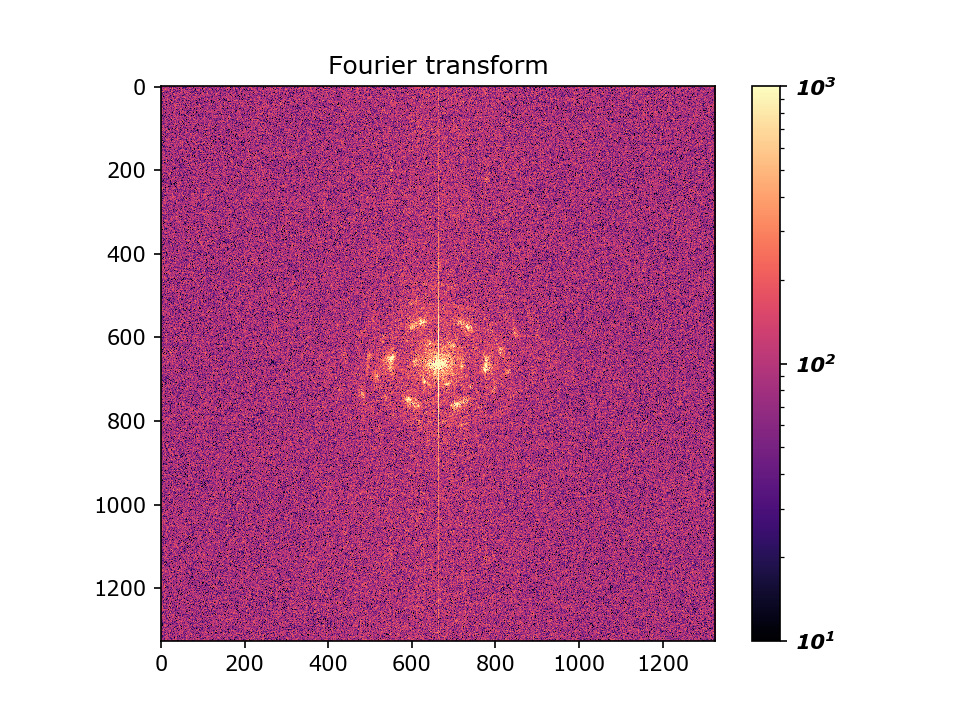

In [96]:
# FFT
# taking fft of all images
im01_fft = fftpack.fft2(norm_01)
im02_fft = fftpack.fft2(norm_02)
im03_fft = fftpack.fft2(norm_02)

def plot_spectrum(im01_fft):
    from matplotlib.colors import LogNorm
    
    # A logarithmic colormap
    plt.imshow(np.fft.fftshift(np.abs(im01_fft)), 
               norm=LogNorm(vmin=10, vmax = 1000), 
               cmap=plt.cm.magma)
               
    plt.colorbar()

plt.figure()
plot_spectrum(im01_fft)
plt.title('Fourier transform')

plt.show()
plt.savefig('images/fft_01.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


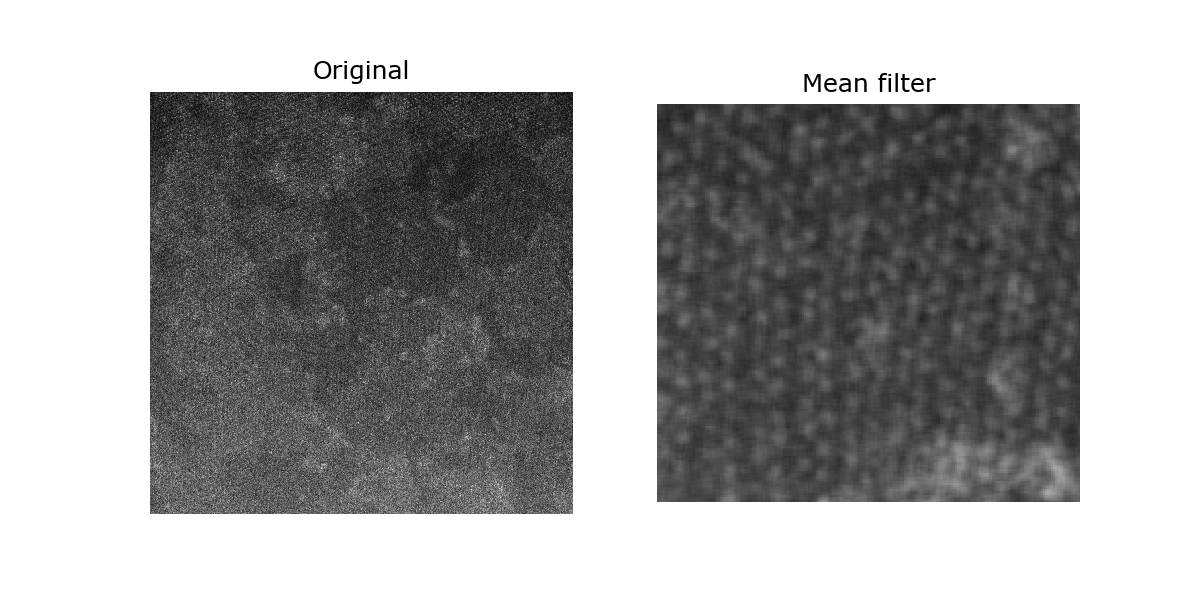

In [97]:
#Mean filter

figure_size = 5
norm_01_filt = cv2.blur(norm_01,(figure_size, figure_size))

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(norm_01, cmap='gray'),plt.title('Original')
plt.axis('off')
#plt.colorbar()

plt.subplot(122) 
plt.imshow(norm_01_filt, cmap='gray'),plt.title('Mean filter')
plt.axis('off')
#plt.colorbar()

plt.show()
plt.savefig('images/mean_filtered_hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


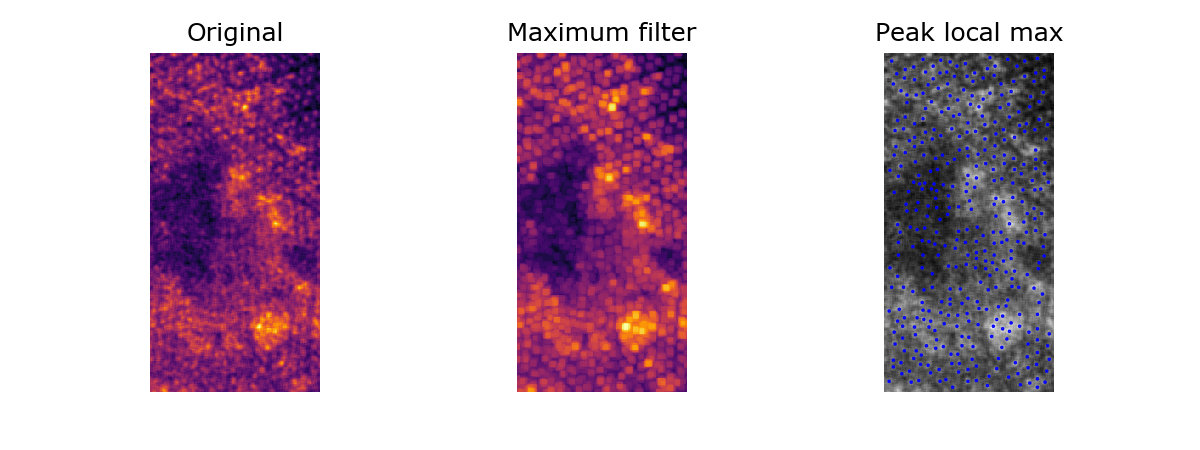

In [114]:
#Peak detection 

#im = new_image[120:420, 520:920]
im = norm_01_filt[400:800, 400:600]

# image_max is the dilation of im with a structuring element defined by 'size'

image_max = ndi.maximum_filter(im, size=5, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.inferno)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.inferno)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].scatter(coordinates[:, 1], coordinates[:, 0], s=0.5, facecolors='none', edgecolors='b')
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'b.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()
#plt.savefig('images/peak_detection_hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)